# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
def get_btc_price():
    btc_info = requests.get(btc_url)
    btc_df = btc_info.json()
    btc_price = btc_df['data']['1']['quotes']['CAD']['price']
    return btc_price

def get_eth_price():
    eth_info = requests.get(eth_url)
    eth_df = eth_info.json()
    eth_price = eth_df['data']['1027']['quotes']['CAD']['price']
    return eth_price

In [6]:
# Fetch current BTC price
# YOUR CODE HERE!
btc_price = get_btc_price()
# Fetch current ETH price
# YOUR CODE HERE!
eth_price = get_eth_price()
# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $80790.12
The current value of your 5.3 ETH is $23543.01


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [8]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_API_KEY")
# Create the Alpaca API object
# YOUR CODE HERE!
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [9]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("2021-10-08", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["SPY","AGG"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    limit=1000
).df
# Preview DataFrame
# YOUR CODE HERE!
df_portfolio

AGG                                        \
                             open     high      low    close     volume   
time                                                                      
2017-10-18 00:00:00-04:00  109.51  109.560  109.460  109.530  1511319.0   
2017-10-19 00:00:00-04:00  109.71  109.750  109.540  109.610  1747693.0   
2017-10-20 00:00:00-04:00  109.32  109.405  109.260  109.305  1768427.0   
2017-10-23 00:00:00-04:00  109.40  109.470  109.360  109.410  1571621.0   
2017-10-24 00:00:00-04:00  109.23  109.290  109.170  109.200  1492997.0   
...                           ...      ...      ...      ...        ...   
2021-10-04 00:00:00-04:00  114.92  115.030  114.795  114.940  3969883.0   
2021-10-05 00:00:00-04:00  114.82  114.867  114.610  114.650  6211634.0   
2021-10-06 00:00:00-04:00  114.68  114.730  114.590  114.700  4748378.0   
2021-10-07 00:00:00-04:00  114.46  114.500  114.340  114.360  3586652.0   
2021-10-08 00:00:00-04:00  114.31  114.350  114.070  114.120  4207570.0   

                              SPY                                         
                             open      high     low   close       volume  
time                                                                      
2017-10-18 00:00:00-04:00     NaN       NaN     NaN     NaN          NaN  
2017-10-19 00:00:00-04:00  254.82  255.8200  254.35  255.82   41439302.0  
2017-10-20 00:00:00-04:00  256.70  257.1400  256.42  257.08   41153383.0  
2017-10-23 00:00:00-04:00  257.48  257.5100  256.02  256.15   36345830.0  
2017-10-24 00:00:00-04:00  256.59  256.8300  256.15  256.55   51308377.0  
...                           ...       ...     ...     ...          ...  
2021-10-04 00:00:00-04:00  433.00  433.9600  426.36  428.69  112134374.0  
2021-10-05 00:00:00-04:00  430.24  435.4900  429.39  433.05   82381830.0  
2021-10-06 00:00:00-04:00  429.27  435.1199  427.54  434.92   99477866.0  
2021-10-07 00:00:00-04:00  438.39  441.6800  438.20  438.64   64139858.0  
2021-10-08 00:00:00-04:00  439.48  439.8900  437.19  437.82   57510090.0  

[1001 rows x 10 columns]

In [10]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
def get_close_price_alpaca(symbol):
    df_portfolio = alpaca.get_barset(
    symbol,
    timeframe,
    start=today,
    end = today
    ).df
    close_value = df_portfolio[symbol]['close'][0]
    return close_value

agg_close_price = get_close_price_alpaca('AGG')
spy_close_price = get_close_price_alpaca('SPY')

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.12
Current SPY closing price: $437.82


In [11]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21891.00
The current value of your 200 AGG shares is $22824.00


### Savings Health Analysis

In [12]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000
# Consolidate financial assets data
# YOUR CODE HERE!
crypto_value = my_btc_value + my_eth_value
shares_value = my_spy_value + my_agg_value
data = {'Amount':[crypto_value,shares_value]}
# Create savings DataFrame
# YOUR CODE HERE!
df_savings = pd.DataFrame(data,index=['Crypto','Shares'])

# Display savings DataFrame
display(df_savings)

,Amount
Crypto,104333.134102
Shares,44715.000000


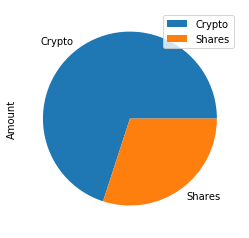

In [13]:
# Plot savings pie chart
# YOUR CODE HERE!
savings_plot_pie = df_savings.plot(kind='pie',y='Amount')

In [14]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = crypto_value + shares_value
# Validate saving health
# YOUR CODE HERE!
if total_savings > emergency_fund:
    print('Congrats on passing your financial goals')
elif total_savings == emergency_fund:
    print('Contrats on having reached your goal')
else:
    extra_need = emergency_fund - total_savings
    print("You need $"+extra_need+"more money to reach your goals")

Congrats on passing your financial goals


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [15]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-10-08', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-10-08', tz='America/New_York').isoformat()

In [16]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end = end_date,
    limit=1000
    ).df


# Display sample data
df_stock_data

AGG                                        \
                             open     high      low    close     volume   
time                                                                      
2017-10-18 00:00:00-04:00  109.51  109.560  109.460  109.530  1511319.0   
2017-10-19 00:00:00-04:00  109.71  109.750  109.540  109.610  1747693.0   
2017-10-20 00:00:00-04:00  109.32  109.405  109.260  109.305  1768427.0   
2017-10-23 00:00:00-04:00  109.40  109.470  109.360  109.410  1571621.0   
2017-10-24 00:00:00-04:00  109.23  109.290  109.170  109.200  1492997.0   
...                           ...      ...      ...      ...        ...   
2021-10-04 00:00:00-04:00  114.92  115.030  114.795  114.940  3969883.0   
2021-10-05 00:00:00-04:00  114.82  114.867  114.610  114.650  6211634.0   
2021-10-06 00:00:00-04:00  114.68  114.730  114.590  114.700  4748378.0   
2021-10-07 00:00:00-04:00  114.46  114.500  114.340  114.360  3586652.0   
2021-10-08 00:00:00-04:00  114.31  114.350  114.070  114.120  4207570.0   

                              SPY                                         
                             open      high     low   close       volume  
time                                                                      
2017-10-18 00:00:00-04:00     NaN       NaN     NaN     NaN          NaN  
2017-10-19 00:00:00-04:00  254.82  255.8200  254.35  255.82   41439302.0  
2017-10-20 00:00:00-04:00  256.70  257.1400  256.42  257.08   41153383.0  
2017-10-23 00:00:00-04:00  257.48  257.5100  256.02  256.15   36345830.0  
2017-10-24 00:00:00-04:00  256.59  256.8300  256.15  256.55   51308377.0  
...                           ...       ...     ...     ...          ...  
2021-10-04 00:00:00-04:00  433.00  433.9600  426.36  428.69  112134374.0  
2021-10-05 00:00:00-04:00  430.24  435.4900  429.39  433.05   82381830.0  
2021-10-06 00:00:00-04:00  429.27  435.1199  427.54  434.92   99477866.0  
2021-10-07 00:00:00-04:00  438.39  441.6800  438.20  438.64   64139858.0  
2021-10-08 00:00:00-04:00  439.48  439.8900  437.19  437.82   57510090.0  

[1001 rows x 10 columns]

In [17]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
def monte_python(years,num_sims=50,weightAGG=0.4,weightSPY=0.6,df=df_stock_data):
    trading_days = 252 * years
    MC_portfolio = MCSimulation(
    portfolio_data = df,
    weights = [weightAGG,weightSPY],
    num_simulation = num_sims,
    num_trading_days = trading_days
    )
    return MC_portfolio

thirty_year_portfolio = monte_python(30,1000)

In [18]:
# Printing the simulation input data
# YOUR CODE HERE!
thirty_year_portfolio.portfolio_data.head()

AGG                                       \
                             open     high     low    close     volume   
time                                                                     
2017-10-18 00:00:00-04:00  109.51  109.560  109.46  109.530  1511319.0   
2017-10-19 00:00:00-04:00  109.71  109.750  109.54  109.610  1747693.0   
2017-10-20 00:00:00-04:00  109.32  109.405  109.26  109.305  1768427.0   
2017-10-23 00:00:00-04:00  109.40  109.470  109.36  109.410  1571621.0   
2017-10-24 00:00:00-04:00  109.23  109.290  109.17  109.200  1492997.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2017-10-18 00:00:00-04:00          NaN     NaN     NaN     NaN     NaN   
2017-10-19 00:00:00-04:00     0.000730  254.82  255.82  254.35  255.82   
2017-10-20 00:00:00-04:00    -0.002783  256.70  257.14  256.42  257.08   
2017-10-23 00:00:00-04:00     0.000961  257.48  257.51  256.02  256.15   
2017-10-24 00:00:00-04:00    -0.001919  256.59  256.83  256.15  256.55   

                                                    
                               volume daily_return  
time                                                
2017-10-18 00:00:00-04:00         NaN          NaN  
2017-10-19 00:00:00-04:00  41439302.0          NaN  
2017-10-20 00:00:00-04:00  41153383.0     0.004925  
2017-10-23 00:00:00-04:00  36345830.0    -0.003618  
2017-10-24 00:00:00-04:00  51308377.0     0.001562

In [19]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
thirty_year_portfolio.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996455,1.000315,1.008953,0.998515,1.004594,1.002059,1.008671,0.996545,0.996279,1.008565,...,1.003444,1.005452,1.010666,0.992971,0.992964,0.977423,1.004821,1.009071,0.991306,0.991778
2,0.995701,1.001657,1.007390,1.014563,1.005631,1.009563,1.010372,1.002245,1.001461,1.004319,...,0.993276,1.005244,1.004830,0.998815,1.009750,0.986198,1.003898,1.009743,0.992327,0.996921
3,1.006542,1.015312,1.001765,1.021725,1.013860,1.011667,1.018905,1.023316,1.005171,1.014161,...,0.996971,0.999602,1.017934,0.987531,1.010352,0.975476,1.012331,1.005480,1.006446,1.001392
4,1.011584,1.007559,1.006119,1.026970,1.012164,1.010577,1.016972,1.018470,1.001038,1.031701,...,0.989615,1.008630,1.019582,0.992747,1.017627,0.962961,1.008460,1.007668,1.005160,0.998185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,29.778289,12.947935,13.941516,10.475308,137.176026,15.017224,31.834633,11.646521,79.236856,24.783160,...,16.826884,15.886969,24.092197,11.189489,15.277660,21.020219,17.630954,18.641771,7.018828,26.577967
7557,29.183715,12.863352,13.971897,10.491295,136.113818,15.187053,31.243363,11.570715,79.819280,24.882664,...,16.675142,15.850620,24.313796,11.217226,15.549026,21.277076,17.743562,18.868699,6.893111,26.799228
7558,29.439398,12.818210,14.003979,10.413407,135.198667,15.226971,31.346620,11.588601,79.074143,25.100316,...,16.698620,15.959494,24.247196,11.115733,15.731711,21.208072,17.938994,18.878391,6.890496,26.844296
7559,29.573064,12.741407,13.907610,10.440622,133.713371,15.149672,31.650177,11.541378,79.574629,25.200464,...,16.665531,16.044641,24.119615,11.062674,15.741727,21.146642,18.234392,19.131982,6.869626,26.679388


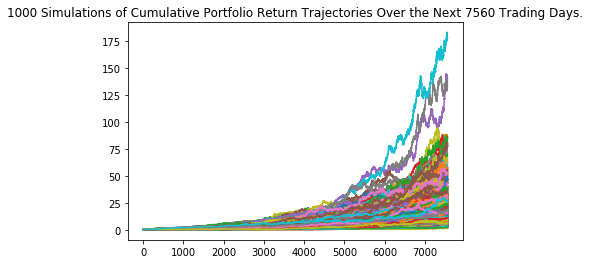

In [20]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = thirty_year_portfolio.plot_simulation()

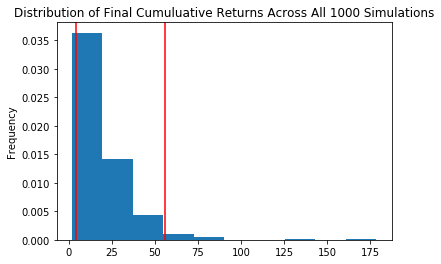

In [21]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = thirty_year_portfolio.plot_distribution()

### Retirement Analysis

In [22]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl = thirty_year_portfolio.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(tbl)

count           1000.000000
mean              19.518204
std               15.431911
min                1.729085
25%                9.863501
50%               15.023393
75%               24.703086
max              178.609311
95% CI Lower       3.999136
95% CI Upper      55.930576
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [23]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(tbl[8]*initial_investment)
ci_upper = round(tbl[9]*initial_investment)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $79983 and $1118612


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [24]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(tbl[8]*initial_investment)
ci_upper = round(tbl[9]*initial_investment)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $119974 and $1677917


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [25]:
df_stock_data

AGG                                        \
                             open     high      low    close     volume   
time                                                                      
2017-10-18 00:00:00-04:00  109.51  109.560  109.460  109.530  1511319.0   
2017-10-19 00:00:00-04:00  109.71  109.750  109.540  109.610  1747693.0   
2017-10-20 00:00:00-04:00  109.32  109.405  109.260  109.305  1768427.0   
2017-10-23 00:00:00-04:00  109.40  109.470  109.360  109.410  1571621.0   
2017-10-24 00:00:00-04:00  109.23  109.290  109.170  109.200  1492997.0   
...                           ...      ...      ...      ...        ...   
2021-10-04 00:00:00-04:00  114.92  115.030  114.795  114.940  3969883.0   
2021-10-05 00:00:00-04:00  114.82  114.867  114.610  114.650  6211634.0   
2021-10-06 00:00:00-04:00  114.68  114.730  114.590  114.700  4748378.0   
2021-10-07 00:00:00-04:00  114.46  114.500  114.340  114.360  3586652.0   
2021-10-08 00:00:00-04:00  114.31  114.350  114.070  114.120  4207570.0   

                              SPY                                         
                             open      high     low   close       volume  
time                                                                      
2017-10-18 00:00:00-04:00     NaN       NaN     NaN     NaN          NaN  
2017-10-19 00:00:00-04:00  254.82  255.8200  254.35  255.82   41439302.0  
2017-10-20 00:00:00-04:00  256.70  257.1400  256.42  257.08   41153383.0  
2017-10-23 00:00:00-04:00  257.48  257.5100  256.02  256.15   36345830.0  
2017-10-24 00:00:00-04:00  256.59  256.8300  256.15  256.55   51308377.0  
...                           ...       ...     ...     ...          ...  
2021-10-04 00:00:00-04:00  433.00  433.9600  426.36  428.69  112134374.0  
2021-10-05 00:00:00-04:00  430.24  435.4900  429.39  433.05   82381830.0  
2021-10-06 00:00:00-04:00  429.27  435.1199  427.54  434.92   99477866.0  
2021-10-07 00:00:00-04:00  438.39  441.6800  438.20  438.64   64139858.0  
2021-10-08 00:00:00-04:00  439.48  439.8900  437.19  437.82   57510090.0  

[1001 rows x 10 columns]

In [26]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
Retirement_portfolio_5 = monte_python(5,500)

In [27]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
Retirement_portfolio_5.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998791,0.991486,1.008241,0.994677,1.004552,0.998492,0.996171,0.985993,1.009920,0.995175,...,0.990736,0.991349,1.012548,0.991001,1.002664,0.991854,1.003447,1.016279,1.008757,0.997430
2,0.993271,1.005528,1.011013,0.988873,0.990706,1.007411,1.000950,0.981268,1.019983,0.985493,...,0.996549,0.994812,1.007553,0.993119,1.009189,0.998854,1.000588,1.003006,1.024645,0.994332
3,0.994040,0.996524,1.012697,0.994673,0.998411,1.008721,1.009415,0.988641,1.023629,0.981420,...,1.002500,1.007544,1.019678,0.997207,1.002591,1.001355,1.001922,1.008017,1.026433,0.986491
4,1.001085,0.998672,1.017851,1.004025,1.012136,1.005749,1.010165,0.984537,1.029348,0.975273,...,1.017305,1.020935,1.021811,1.004517,1.010085,1.001636,1.006183,1.014418,1.031121,0.984132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.441912,1.206914,3.161882,1.613366,2.089338,1.959201,1.262818,2.566959,1.486868,1.700499,...,1.186542,1.369611,1.864179,1.476959,0.894623,1.705083,1.346598,2.171909,1.960755,2.398878
1257,2.433178,1.216679,3.158936,1.621716,2.085507,1.956482,1.276871,2.575574,1.497648,1.690822,...,1.159416,1.374763,1.872781,1.466116,0.899939,1.702561,1.347404,2.173762,1.965606,2.421288
1258,2.385604,1.211622,3.167211,1.624369,2.117873,1.949097,1.278909,2.595942,1.482200,1.675193,...,1.153328,1.392553,1.874125,1.462481,0.901566,1.724625,1.352560,2.180404,1.970213,2.397383
1259,2.401818,1.217270,3.173555,1.626973,2.105409,1.959726,1.282786,2.634946,1.468768,1.655984,...,1.161551,1.392307,1.878737,1.475285,0.912343,1.724907,1.358278,2.223410,1.985653,2.388685


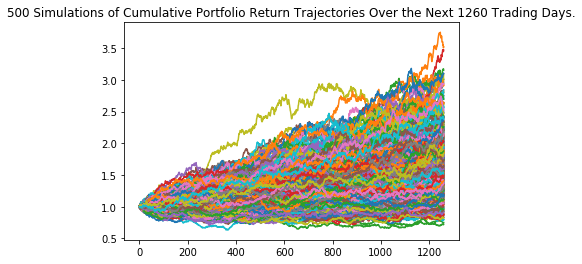

In [28]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = Retirement_portfolio_5.plot_simulation()

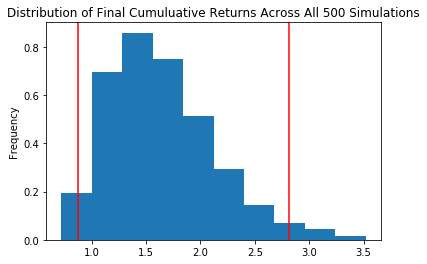

In [29]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = Retirement_portfolio_5.plot_distribution()

In [30]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl = Retirement_portfolio_5.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(tbl)

count           500.000000
mean              1.648023
std               0.484912
min               0.722689
25%               1.285291
50%               1.570648
75%               1.931257
max               3.519306
95% CI Lower      0.879533
95% CI Upper      2.810947
Name: 1260, dtype: float64


In [31]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_five = round(tbl[8]*initial_investment)
ci_upper_five = round(tbl[9]*initial_investment)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $52772 and $168657


### Ten Years Retirement Option

In [32]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
Retirement_portfolio_10 = monte_python(10,500)

In [33]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
Retirement_portfolio_10.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000774,1.007080,0.987099,0.996794,0.998803,1.011233,1.003286,0.996466,1.002184,1.008231,...,1.007709,0.998073,1.001290,1.009070,0.996134,0.984007,1.010563,1.003662,1.009137,0.994064
2,0.992200,1.013321,0.976565,0.990730,1.005871,1.020869,1.022213,0.984822,0.995468,1.009804,...,1.006920,0.985126,1.000425,1.012631,0.983764,0.977642,1.010130,0.993979,1.010560,1.002153
3,1.000558,1.019518,0.981449,0.990634,1.001651,1.018004,1.016992,0.995805,0.975151,1.008553,...,1.014040,0.981772,0.999775,1.002118,0.973617,0.988816,1.003967,1.007815,0.999545,1.006280
4,0.991388,1.001618,0.987939,0.987832,1.005394,1.013850,1.027330,0.988447,0.980244,1.022538,...,1.000323,0.986733,0.999649,0.990331,0.978462,0.984756,0.994080,1.011051,0.998943,1.012833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.149403,1.122912,1.993711,2.260798,3.410882,3.541082,2.441620,3.575174,3.799331,3.872210,...,2.314384,1.464855,4.121947,1.815201,1.711715,1.912847,2.116187,2.430700,3.491500,3.316977
2517,2.142068,1.120313,1.968890,2.234675,3.415238,3.563873,2.430605,3.583995,3.819601,3.905490,...,2.331625,1.442486,4.186924,1.819181,1.699694,1.931673,2.067470,2.411298,3.510473,3.366694
2518,2.162338,1.122750,1.967890,2.242554,3.426031,3.513249,2.425250,3.553821,3.747148,3.913846,...,2.349797,1.451976,4.203856,1.785615,1.707056,1.939664,2.072098,2.398352,3.511841,3.347249
2519,2.166284,1.101583,1.940603,2.217932,3.423090,3.521884,2.405707,3.584974,3.771632,3.870072,...,2.315687,1.466193,4.186447,1.796093,1.680923,1.939718,2.082321,2.372497,3.490052,3.359501


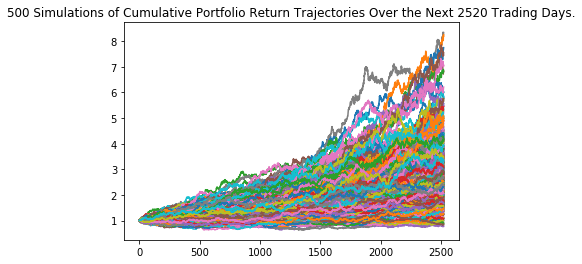

In [34]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = Retirement_portfolio_10.plot_simulation()

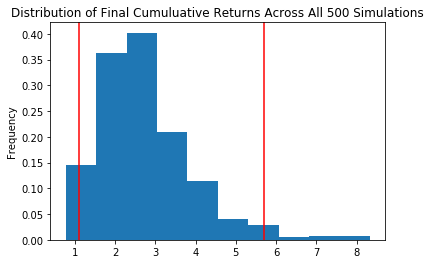

In [35]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = Retirement_portfolio_10.plot_distribution()

In [36]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl = Retirement_portfolio_10.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(tbl)

count           500.000000
mean              2.739748
std               1.172419
min               0.773311
25%               1.916022
50%               2.514829
75%               3.269889
max               8.334924
95% CI Lower      1.095729
95% CI Upper      5.709628
Name: 2520, dtype: float64


In [37]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten = round(tbl[8]*initial_investment)
ci_upper_ten = round(tbl[9]*initial_investment)
# Print results
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $65744 and $342578
